# STEP:1 Problem Statement

####  - Evaluate Amazon's sales performance across different regions and product categories, focusing on the distribution of order statuses and their correlation with revenue. 
#### - The objective is to identify high-performing and underperforming areas, understand the underlying drivers of these variations, and recommend targeted strategies for optimization and growth.

# STEP:2 Data Collection

In [1]:
#importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('amazon_data.csv',encoding= 'unicode_escape')

# STEP:3 DATA EXPLORATION

In [3]:
df.shape

(128976, 21)

In [4]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [5]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [6]:
df.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
B2B                      bool
fulfilled-by           object
New                   float64
PendingS              float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [8]:
df.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


In [9]:
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

# Data Cleaning

In [10]:
#droping index column
df.drop('index',axis=1,inplace = True)

In [11]:
#drop irrilevant/blank columns
df.drop(['New','PendingS','fulfilled-by',], axis=1, inplace=True)

In [12]:
df.shape

(128976, 17)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128976 non-null  object 
 1   Date                128976 non-null  object 
 2   Status              128976 non-null  object 
 3   Fulfilment          128976 non-null  object 
 4   Sales Channel       128976 non-null  object 
 5   ship-service-level  128976 non-null  object 
 6   Category            128976 non-null  object 
 7   Size                128976 non-null  object 
 8   Courier Status      128976 non-null  object 
 9   Qty                 128976 non-null  int64  
 10  currency            121176 non-null  object 
 11  Amount              121176 non-null  float64
 12  ship-city           128941 non-null  object 
 13  ship-state          128941 non-null  object 
 14  ship-postal-code    128941 non-null  float64
 15  ship-country        128941 non-nul

<AxesSubplot:>

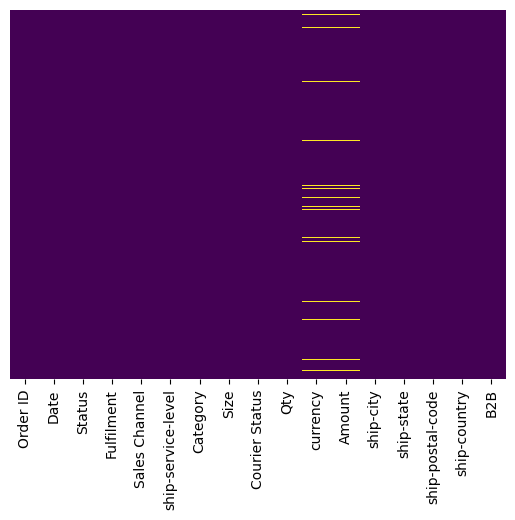

In [14]:
#checking null values using seaborn
sns.heatmap(df.isnull(),yticklabels = False ,cbar = False , cmap='viridis')

In [15]:
#droping null values
df.dropna(inplace=True)

In [16]:
df.shape

(121143, 17)

In [17]:
# changing  data type 
df['ship-postal-code']=df['ship-postal-code'].astype('int')

In [18]:
#rename Columns
df.rename(columns={'Qty':'Quantity'})

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013,IN,False
128972,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004,IN,False
128973,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049,IN,False
128974,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.00,Halol,Gujarat,389350,IN,False


In [19]:
#describe() method return description of the data in the DataFrame(i.e count,mean,std,min..etc)
df.describe()

,Qty,Amount,ship-postal-code
count,121143.000000,121143.000000,121143.000000
mean,0.961252,648.576874,463623.724507
std,0.214276,281.196896,191301.588170
min,0.000000,0.000000,110001.000000
25%,1.000000,449.000000,382421.000000
50%,1.000000,605.000000,500032.000000
75%,1.000000,788.000000,600020.000000
max,8.000000,5584.000000,989898.000000


In [20]:
df.describe(include='object')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country
count,121143,121143,121143,121143,121143,121143,121143,121143,121143,121143,121143,121143,121143
unique,112861,91,12,2,1,2,9,11,3,1,8697,68,1
top,171-5057375-2831560,05-02-2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN
freq,12,1932,77589,83629,121143,82713,47038,20965,109458,121143,10675,21084,121143


In [21]:
#use describe() for specific columns
df[['Qty','Amount']].describe()

,Qty,Amount
count,121143.000000,121143.000000
mean,0.961252,648.576874
std,0.214276,281.196896
min,0.000000,0.000000
25%,1.000000,449.000000
50%,1.000000,605.000000
75%,1.000000,788.000000
max,8.000000,5584.000000


# Exploratory Data Analysis

In [22]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')

### 1Q) How many orders are placed per each Category

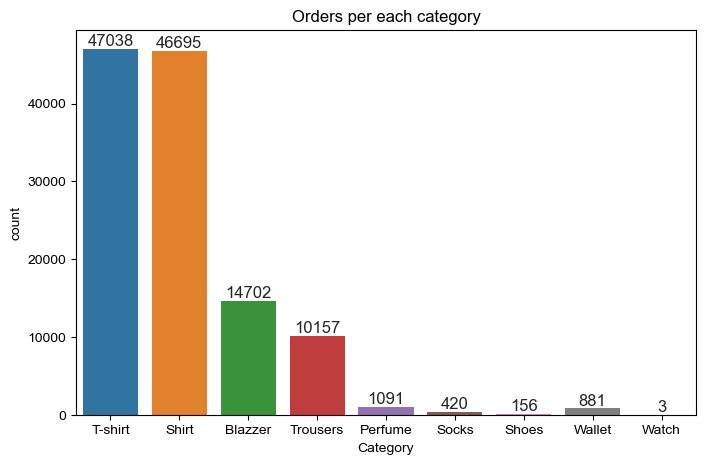

In [23]:
#no of orders of each Category
plt.figure(figsize=(8, 5))
ax=sns.countplot(x='Category' ,data=df)
plt.title('Orders per each category')
sns.set_theme(style='darkgrid')
for bars in ax.containers:
    ax.bar_label(bars)

- From the above plot we can observe that the most orders are placed for T-shirts , shirts and followed by other categories

### 2Q) Which Category Generated the most revenue

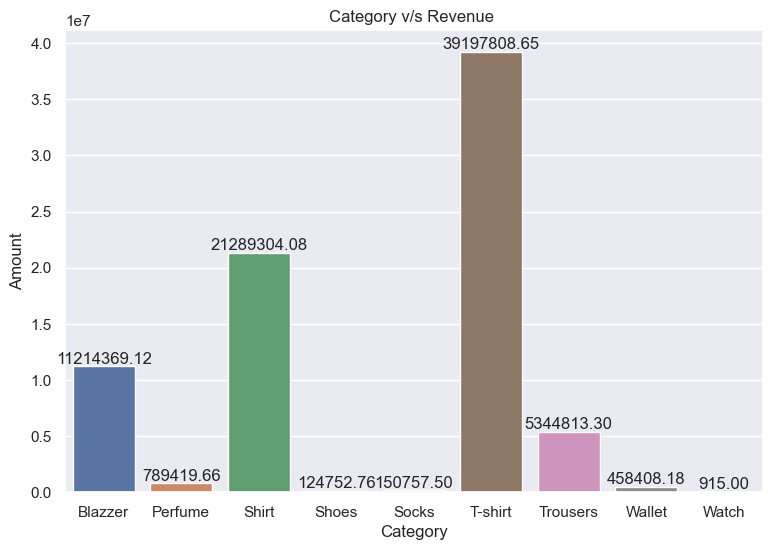

In [24]:
#Revenue Generated by each category
ax = df.groupby('Category', as_index=False)['Amount'].sum()

plt.figure(figsize=(9, 6)) 
plot = sns.barplot(x='Category', y='Amount', data=ax)
plt.title('Category v/s Revenue ')

# Add value labels on top of each bar
for i in plot.containers:
    plot.bar_label(i, fmt='%.2f') 
plt.show()

- From the above plot we can observe that T-shirt's generated the highest revenue followed by shirts and blazzer

###  3Q) Display the number of orders placed for each size

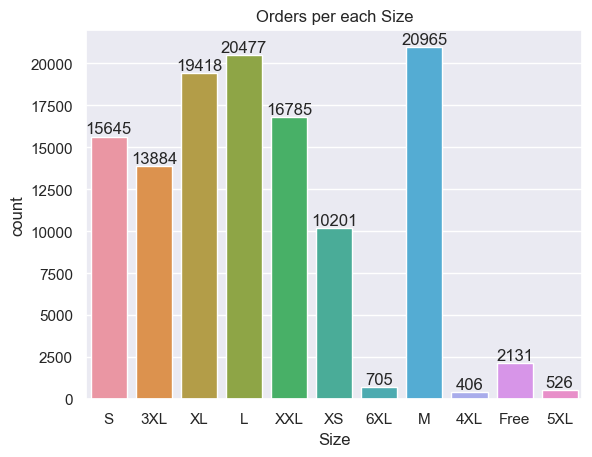

In [25]:
#no of orders of each size
ax=sns.countplot(x='Size' ,data=df)
plt.title('Orders per each Size')
for bars in ax.containers:
    ax.bar_label(bars)

- From the above plot we can observe that there is more demand for M,L,XL sizes followed by others 

### 4Q) Display the shipping Status 

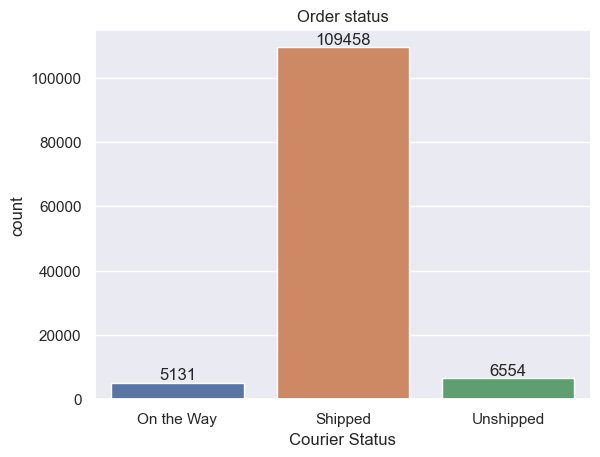

In [26]:
#Shipping Status of orders
ax=sns.countplot(data=df, x='Courier Status')
plt.title('Order status')
for bars in ax.containers:
    ax.bar_label(bars)

- From the above plot we can observe that most of the orders are shipped safely

### 5Q) What is the percentage of B2B and B2C orders

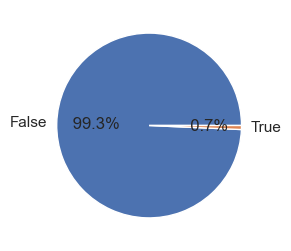

In [27]:
# Checking B2B Data  by using pie chart 
B2B_Check = df['B2B'].value_counts()

#  Plot the pie chart
plt.figure(figsize=(3,3))
plt.pie(B2B_Check, labels=B2B_Check.index, autopct='%5.1f%%')
plt.show()

- From the above plot we can observe that 99.3% of the orders are B2B 

### 6Q) What is the percentage of orders that are fulfilled by amozon and Merchant

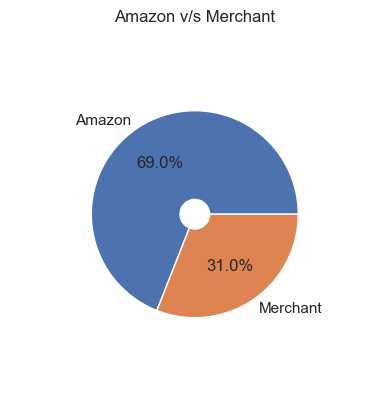

In [28]:
#  Fullfilment of order(amazon/merchant)
a1 = df['Fulfilment'].value_counts()
fig, ax = plt.subplots()
ax.pie(a1, labels=a1.index, autopct='%1.1f%%', radius=0.7, wedgeprops=dict(width=0.6))
plt.title('Amazon v/s Merchant')
ax.set(aspect="equal")
plt.show()

- From the above plot we can observe that 69% of the orders fullfilled by amazon and 31% are by merchant

### 7Q) Display the top 10 states with most number of orders

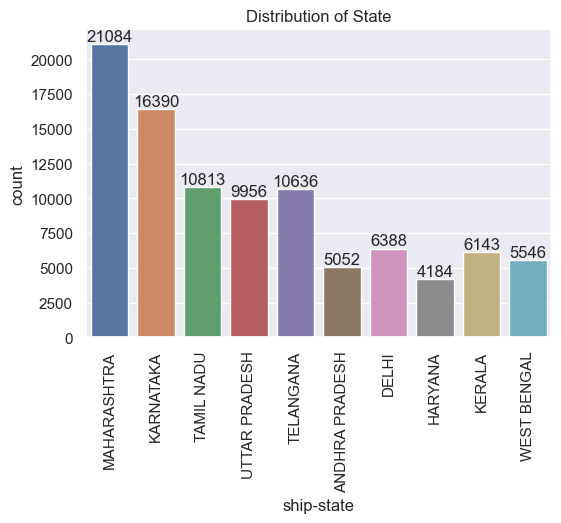

In [29]:
#Top ten states with most orders
top_10_state = df['ship-state'].value_counts().head(10)

# Create the plot
plt.figure(figsize=(6, 4))
plot = sns.countplot(data=df[df['ship-state'].isin(top_10_state.index)], x='ship-state')

# Add value labels on top of each bar
for i in plot.containers:
    plot.bar_label(i, label_type='edge')  # Adds the count on top of each bar

# Customize the plot
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()

- From the above plot we can observe that Maharashtra placed most number of orders followed by other states

### 8) Display the top 10 states with highest revenue

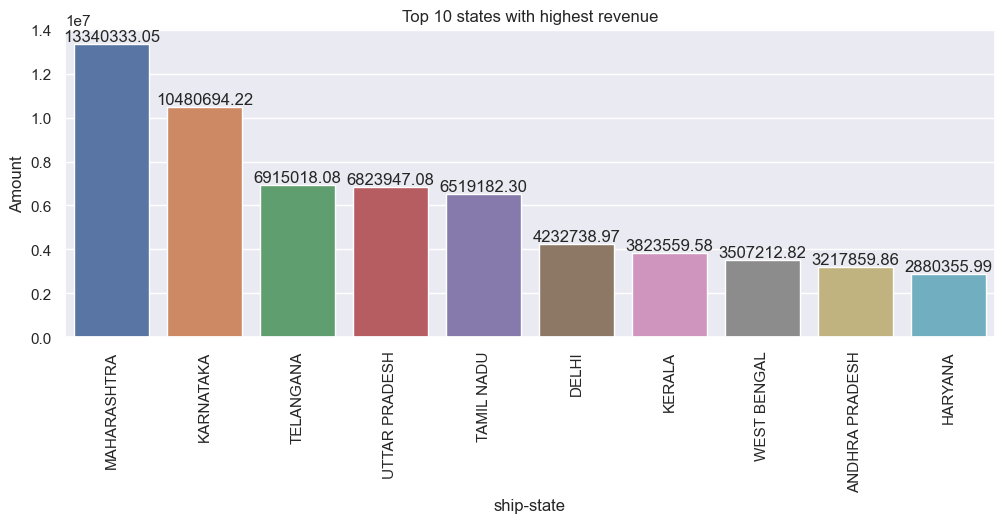

In [30]:
#Top 10 states with highest revenue
ax=df.groupby('ship-state',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
plt.figure(figsize=(12,4))
plt.xticks(rotation=90)
plt.title('Top 10 states with highest revenue')
plot = sns.barplot(x='ship-state', y='Amount', data=ax)

# Add value labels on top of each bar
for i in plot.containers:
    plot.bar_label(i, fmt='%.2f') 
plt.show()

- From the above plot we can observe that maharashtra generated the highest revenu followed by karnataka

### 9) Display the top 10 Cities with highest revenue

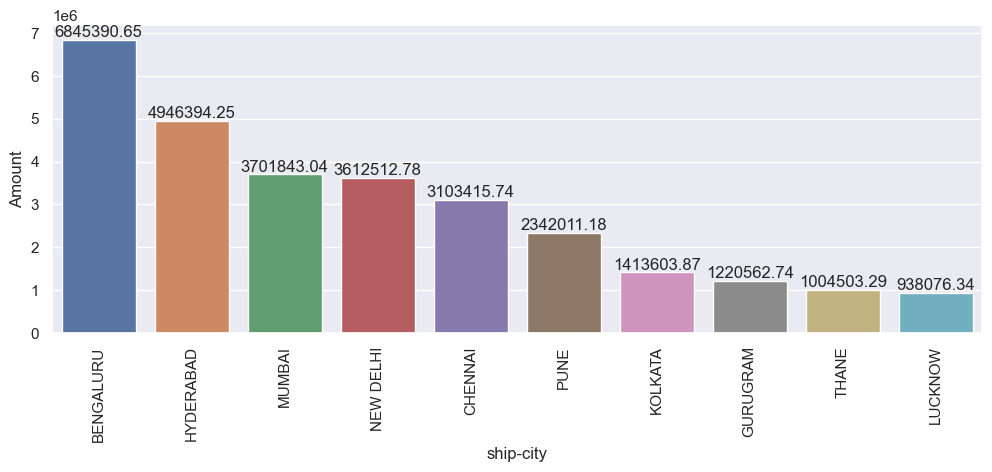

In [31]:
#Top 10 cities with highest revenue
ax=df.groupby('ship-city',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
plt.figure(figsize=(12,4))
plt.xticks(rotation=90)
plot = sns.barplot(x='ship-city', y='Amount', data=ax)

# Add value labels on top of each bar
for i in plot.containers:
    plot.bar_label(i, fmt='%.2f') 
plt.show()

- From the above plot we can observe that beguluru generated highest revenue followed by hyderabad

### 10) Which Month received highest number of orders

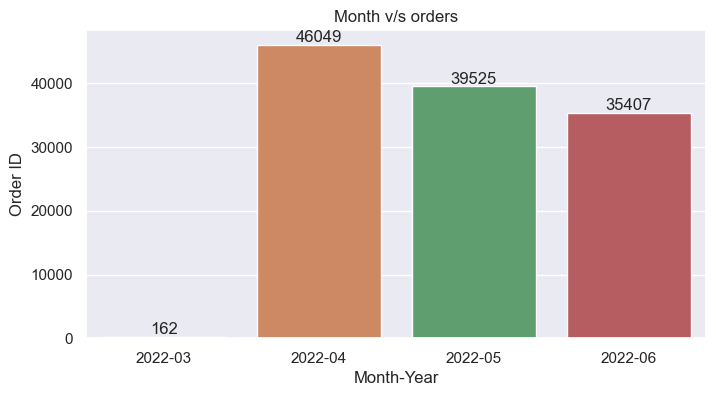

In [32]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year from Date
df['Month-Year'] = df['Date'].dt.strftime('%Y-%m')

# Count orders by month
monthly_orders = df.groupby('Month-Year')['Order ID'].count().reset_index()

# Create the plot
plt.figure(figsize=(8, 4))
plot = sns.barplot(x='Month-Year', y='Order ID', data=monthly_orders)
plt.title('Month v/s orders')

# Add value labels on top of each bar
for i in plot.containers:
    plot.bar_label(i, label_type='edge')

- From the above plot we can observe that april received the most number of orders

### 11Q) Which month generated the most revenue

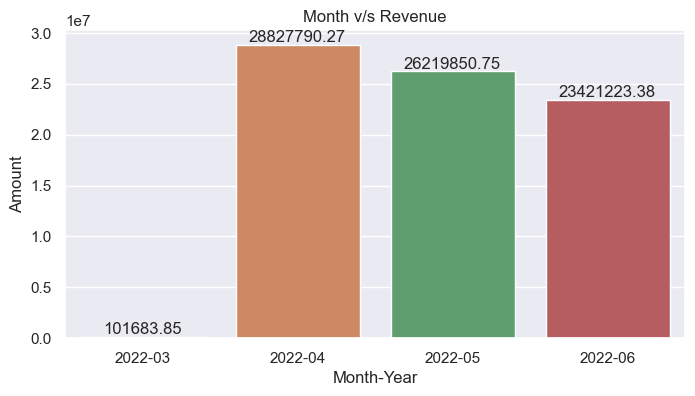

In [33]:
#Revenue generated by each month
df['Date'] = pd.to_datetime(df['Date']) # Convert Date column to datetime
df['Month-Year'] = df['Date'].dt.strftime('%Y-%m') # Extract month and year from Date
monthly_orders = df.groupby('Month-Year')['Amount'].sum().reset_index() # Count orders by month

# Create the plot
plt.figure(figsize=(8, 4))
plot = sns.barplot(x='Month-Year', y='Amount', data=monthly_orders)
plt.title('Month v/s Revenue')

# Add value labels on top of each bar
for i in plot.containers:
    plot.bar_label(i, label_type='edge',fmt='%.2f')

- From the above plot we can observe that april generated the highest revenue

### 12Q) Display the most common shipping service level

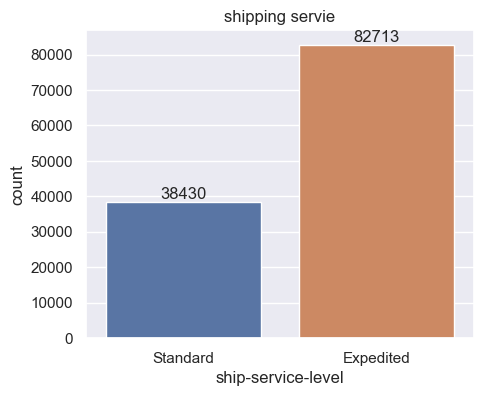

In [34]:
#Most common shipping service level
plt.figure(figsize=(5, 4))
ax=sns.countplot(x='ship-service-level' ,data=df)
plt.title('shipping servie')

for bars in ax.containers:
    ax.bar_label(bars)

- From the above plot we can observe that most of the people opted expedited service leve

### 13Q) Which state has the highest cancelled orders

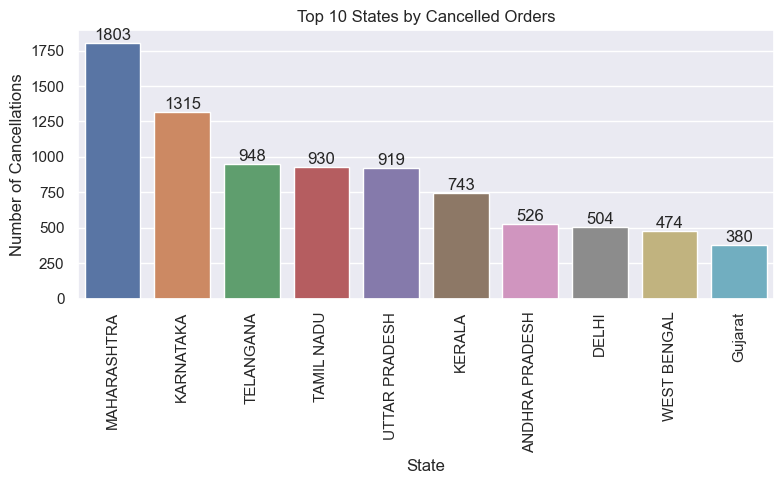

In [35]:
cancelled_by_state = df[df['Status'] == 'Cancelled']['ship-state'].value_counts().head(10)

# Create plot
plt.figure(figsize=(8, 5))
plot = sns.barplot(x=cancelled_by_state.index, y=cancelled_by_state.values)

# Add value labels
for i in plot.containers:
    plot.bar_label(i, label_type='edge')

# Customize plot
plt.title('Top 10 States by Cancelled Orders')
plt.xlabel('State')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- From the above plot we can observe that maharahtra cancelled more orders

In [36]:
pwd

'C:\\Users\\Sanjay'